### **Trabalho 1 - Introdução ao Processamento Digital de Imagens**
####Nome: Gabriela Jachs Stepien

##Questão 2:
Implemente uma função na linguagem de programação Python que realiza a convolução (sem utilizar as funções disponíveis nas bibliotecas padrão de filtragem do OpenCv, como a filter2D, por exemplo) de uma imagem de entrada em tons de cinza pelo filtro da mediana. Depois disso, modifique a sua função para que ela realize a convolução utilizando o filtro da média e laplaciano. Faça um comparativo dos efeitos de cada um dos filtros.

OBS 1: Como sugestão para execução das tarefas, use a imagem 1 (mamografia) do capítulo 3 do Gonzalez, 3ª edição.

OBS 2: as imagens do livro texto da disciplina estão disponíveis em:
 
http://www.imageprocessingplace.com/DIP-E/dip3e_book_images_downloads.htm

##***Importação das bibliotecas:***

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


##***Para baixar a imagem:***
[BreastXRay](https://drive.google.com/file/d/1wpqPbVRtfEYCzsBGB9parKFe0fRYWa6P/view?usp=sharing)

##***Carregando uma imagem:***

In [ ]:
img_breast = cv2.imread("/content/Fig0304(a)(breast_digital_Xray).tif", cv2.IMREAD_GRAYSCALE)

##***Filtros:***
## ***Filtros passa-baixa:***
### ***Filtro de média:***
### ***Filtro de mediana:***

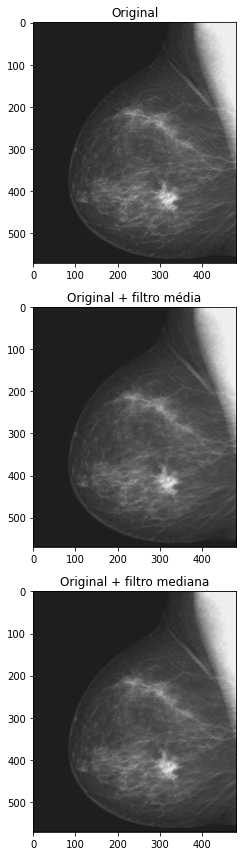

In [ ]:
def convolucao(img_breast, w):
    borda = (w.shape[0]-1)//2
    altura, largura = img_breast.shape
    img_saida = np.zeros((altura, largura))
    w = w[::-1,::-1] #rotação do kernel p/ convolução

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            img_saida[x,y] = np.ceil(np.sum(img_breast[x-borda:x+borda+1, y-borda:y+borda+1]*w))
    return img_saida

def filtro_mediana(img_breast, tamanho_kernel):
    borda = (tamanho_kernel-1)//2
    altura, largura = img_breast.shape
    img_saida = np.zeros((altura, largura))

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            img_saida[x,y] = np.median(img_breast[x-borda:x+borda+1, y-borda:y+borda+1])
    return img_saida

n = 3
kernel_media = np.ones((n,n))/(n**2)

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.title("Original")
plt.imshow(img_breast, cmap="gray", vmin=0, vmax=255)

plt.subplot(3,3,4)
plt.title("Filtro média")
plt.imshow(convolucao(img_breast, kernel_media), cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,7)
plt.title("Filtro mediana")
plt.imshow(filtro_mediana(img_breast, n), cmap='gray', vmin=0, vmax=255)


plt.tight_layout()

## ***Filtros passa-alta:***

### ***Filtro laplaciano:***



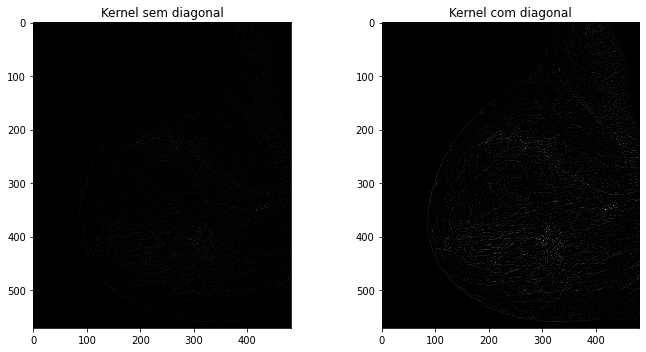

In [ ]:
kernel_laplace = np.array([[ 0,-1, 0],
                           [-1, 4,-1],
                           [ 0,-1, 0]])

kernel_laplace_diag = np.array([[-1,-1,-1],
                                [-1, 8,-1],
                                [-1,-1,-1]])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Kernel sem diagonal')
plt.imshow(convolucao(img_breast, kernel_laplace), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Kernel com diagonal')
plt.imshow(convolucao(img_breast, kernel_laplace_diag), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()